In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## The Tips dataset

Variables:
  * bill in dollars,
  * tip in dollars,
  * gender of the bill payer,
  * whether there were smokers in the party,
  * day of the week,
  * time of day,
  * size of the party.

In all he recorded 244 tips. The data was reported in a collection of case studies for business statistics (Bryant & Smith 1995).

https://rdrr.io/cran/reshape2/man/tips.html

# Comment modèliser la variable aléatoire "tipps"

## Loi log-normale

[fr.wikipedia.org/wiki/Loi_log-normale](https://fr.wikipedia.org/wiki/Loi_log-normale)

La loi log-normale de paramètres $\mu$ et $\sigma$ admet pour densité de probabilité :

$$
f_{X}(x;\mu,\sigma) = \frac{1}{x \sigma \sqrt{2 \pi}} \exp\left(- \frac{(\ln x - \mu)^2}{2\sigma^2}\right) = \frac{1}{x}f_{Y}(\ln(x);\mu,\sigma)
$$

pour $x>0$.
Les paramètres $\mu$ et $\sigma$ sont l'Espérance mathématique et l'écart type du logarithme de la variable (puisque par définition, le logarithme de la variable est distribué selon une loi normale d'espérance $\mu$ et d'écart-type $\sigma$).

<img src="https://upload.wikimedia.org/wikipedia/commons/4/46/Lognormal_distribution_PDF.png" alt="LogNormal pdf" width="480" height="360" border="1" />


# Comment modéliser les variables aléatoires : 
  * bill in dollars,
  * tip in dollars,
  * gender of the bill payer,
  * whether there were smokers in the party,
  * day of the week,
  * time of day,
  * size of the party.



In [2]:
url="https://fxjollois.github.io/cours-2016-2017/donnees/tips.csv"
dataframe_tips=pd.read_csv(url)
dataframe_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [3]:
dataframe_tips.mean()

TypeError: Could not convert ['FemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemale'
 'NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesYesYesNoNoNoYesNoYesNoNoYesYesNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesYesNoYesYesYesYesNoYesYesYesYesNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoNoYesYesYesNoNoYesNoYesYesNoNoYesYesNoNo'
 'SunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatThurThurThurThurThurThurThurThurThurThurThurThurThurFriFriFriFriFriFriFriFriFriFriFriFriSatSatSatSatSatSatSatSatSatSatSunSunSunSunSunThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSatSatSatSatSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunSunThurThurThurThurThurThurThurThurThurThurThurThurThurThurThurSatSatSatSatSatSatSatSatSatSatSatSatSatSatFriFriFriFriFriFriFriSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatSatThur'
 'DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchLunchDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerLunchLunchLunchLunchLunchLunchLunchDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinnerDinner'] to numeric

In [4]:
dataframe_tips.describe(include='all')

total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672
std       8.902412    1.383638   NaN    NaN  NaN     NaN    0.951100
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000
25%      13.347500    2.000000   NaN    NaN  NaN     NaN    2.000000
50%      17.795000    2.900000   NaN    NaN  NaN     NaN    2.000000
75%      24.127500    3.562500   NaN    NaN  NaN     NaN    3.000000
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000

In [5]:
dataframe_tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [6]:
tips_day = dataframe_tips['day'].to_numpy()
print(tips_day)

['Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun'
 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat'
 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat'
 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun'
 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sat' 'Sat' 'Sat' 'Sat'
 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat'
 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur'
 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Fri' 'Fri' 'Fri' 'Fri'
 'Fri' 'Fri' 'Fri' 'Fri' 'Fri' 'Fri' 'Fri' 'Fri' 'Sat' 'Sat' 'Sat' 'Sat'
 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Thur'
 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur'
 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur'
 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur'
 'Thur' 'Thur' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun

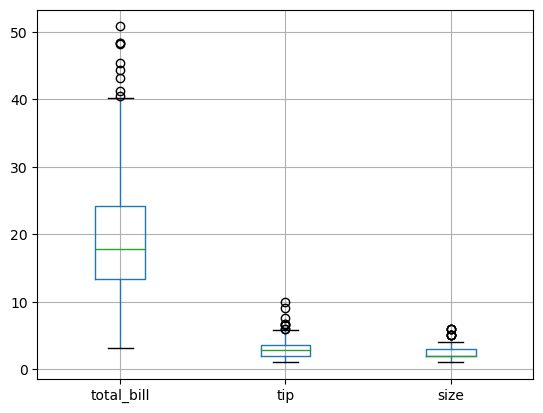

In [7]:
boxplot = dataframe_tips.boxplot()

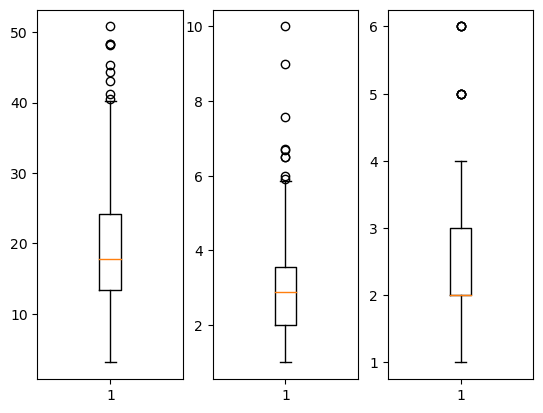

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
t = dataframe_tips.total_bill
ax1.boxplot(t)
x = dataframe_tips.tip
ax2.boxplot(x)
y = dataframe_tips['size'].to_numpy()
ax3.boxplot(y)
plt.show()

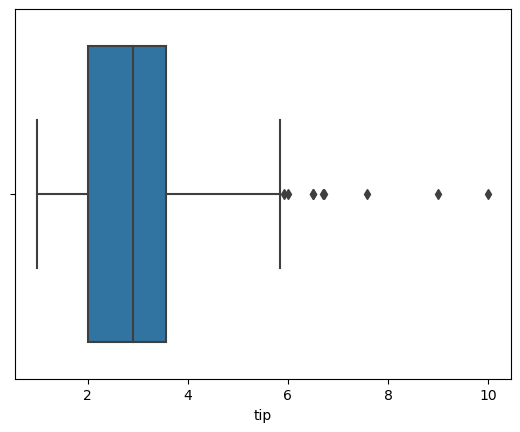

In [9]:
ax = sns.boxplot(x=x)
plt.show()

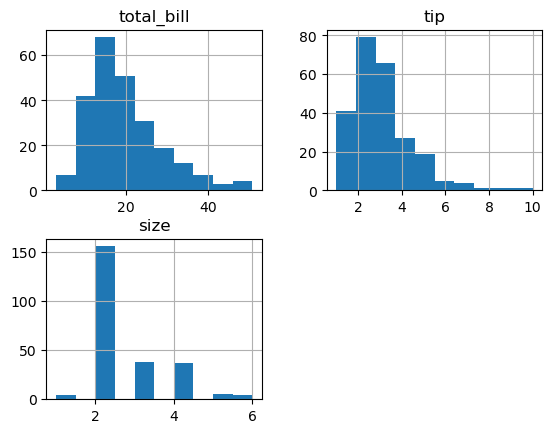

In [10]:
dataframe_tips.hist()
plt.show()

## scipy.stats.lognorm

(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html)

 The probability density function for `lognorm` is:

 $$        f(x, s) = \frac{1}{s x \sqrt{2\pi}}
                  \exp\left(-\frac{\log^2(x)}{2s^2}\right)
$$
for $x > 0$, $s > 0$.

lognorm takes s as a shape parameter for $s$

The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, lognorm.pdf(x, s, loc, scale) is identically equivalent to lognorm.pdf(y, s) / scale with y = (x - loc) / scale. Note that shifting the location of a distribution does not make it a “noncentral” distribution; noncentral generalizations of some distributions are available in separate classes.

Suppose a normally distributed random variable $X$ has  mean $\mu$ and standard deviation $\sigma$. Then $Y = exp(X)$ is lognormally distributed with $s = \sigma$ and $scale = exp(\mu)$.


Probability density function: pdf(x, s, loc=0, scale=1)    

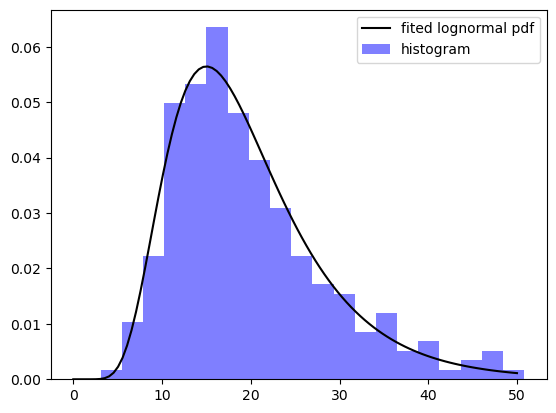

In [22]:
import scipy.stats as stats

mean = dataframe_tips['total_bill'].mean()
stdev = dataframe_tips['total_bill'].std()

sigma = np.sqrt(np.log(stdev**2/mean**2+1))
mu = np.log(mean) - sigma**2/2

# phi = (stdev ** 2 + mean ** 2) ** 0.5
# mu = np.log(mean ** 2 / phi)
# sigma = (np.log(phi ** 2 / mean ** 2)) ** 0.5

range_x = np.linspace(0,50, 100)
p = stats.lognorm.pdf(x = range_x, scale = np.exp(mu), s = sigma)
t = dataframe_tips.total_bill
plt.hist(t, bins=20, density=True, alpha=0.5, color='b')
plt.plot(range_x, p,'k')
plt.legend(['fited lognormal pdf','histogram'])
plt.show()

## Does it looks ok?

# Summary: the statistical approach

1. what is the question (set the problem and the data to be gathered)
2. propose a statitical model
3. get the data
4. fit the model to the data
5. check if it looks ok

In [18]:
tb = np.log(dataframe_tips['total_bill'])
print(tb.mean()-mu)
print(tb.std()-sigma)

-0.0024839660536812858
0.009510043446327165


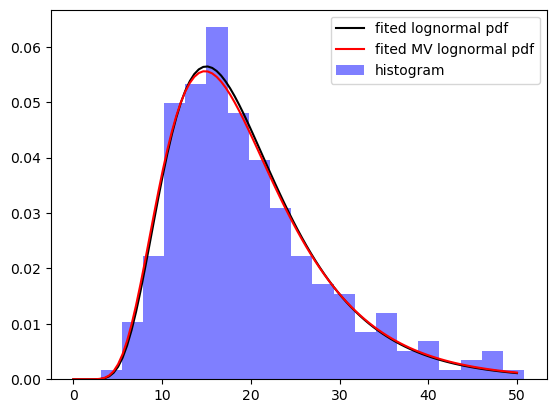

In [23]:
pm = stats.lognorm.pdf(x = range_x, scale = np.exp(tb.mean()), s = tb.std())
plt.hist(t, bins=20, density=True, alpha=0.5, color='b')
plt.plot(range_x, p,'k')
plt.plot(range_x, pm,'r')
plt.legend(['fited lognormal pdf','fited MV lognormal pdf','histogram'])
plt.show()